In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [96]:
fever=pd.read_excel(r"E://anaconda//Fever.xlsx")
fever.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [97]:
fever.describe()

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

In [98]:
fever.shape

(36, 4)

In [99]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [100]:
fever.duplicated().sum()

0

Null Hypothesis: mu1=mu2=mu3


Alternate Hypothesis: mu1<>mu2<>mu3

In [101]:
fever["A"]=pd.Categorical(fever.A)
fever.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [102]:
formula="Relief~C(A)"
model=ols(formula,fever).fit()
anova_table=anova_lm(model)
print(anova_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


Since the p value is less than the significance level, we can reject the null hupothesis and states that there is a difference in the mean A ingridents. 

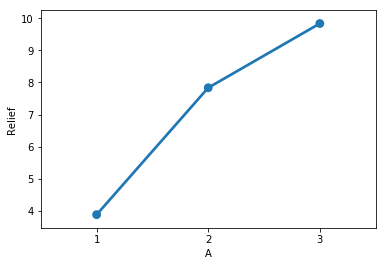

In [103]:
sns.pointplot(x='A', y='Relief', data=fever, ci=None)

Null Hypothesis: mu1=mu2=mu3

Alternate Hypothesis: mu1<>mu2<>mu3

In [104]:
fever["B"]=pd.Categorical(fever.B)
fever.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [106]:
## Null Hypothesis: mu1=mu2=mu3

## Alternate Hypothesis: mu1<>mu2<>mu3

In [107]:
formula="Relief~C(B)"
model=ols(formula,fever).fit()
anova_table=anova_lm(model)
print(anova_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


Since the p value is less than the significance level, we can reject the null hupothesis and states that there is a difference in the mean B ingridents.

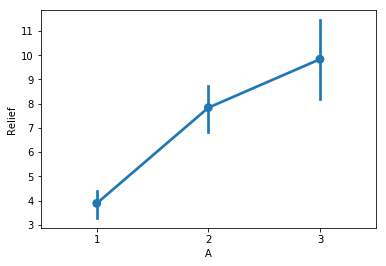

In [108]:
a=sns.pointplot(x='A', y='Relief', data=fever )

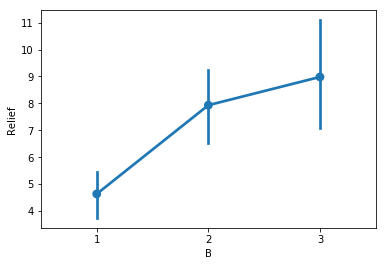

In [109]:
b=sns.pointplot(x='B', y='Relief', data=fever)

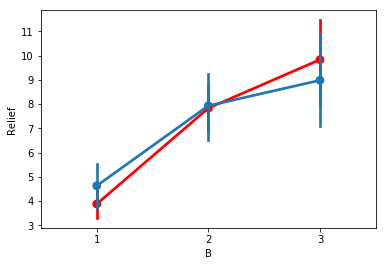

In [110]:
b=sns.pointplot(x='A', y='Relief', data=fever,color="red")
a=sns.pointplot(x='B', y='Relief', data=fever)

In [111]:
formula = 'Relief ~ C(A) * C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


In [112]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [113]:
## By performing two way anova with & without interaction we got the p-value less than 0.005 and it shows us that there
 # is differences in the treatment.

In [114]:
edu=pd.read_excel(r"E:\\anaconda\\edu.xlsx")
edu.head(5)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [115]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.3+ KB


In [116]:
edu.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [117]:
edu["Names"].nunique()

777

In [118]:
edu.skew()

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [119]:
edu.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [120]:
edu.shape

(777, 18)

In [121]:
edu.duplicated().sum()

0

In [122]:
edu.Names.str.count("Univ").sum()

351

In [123]:
edu.Names.str.count("College").sum()

406

In [124]:
edu.Names.str.count("Institute of Technology").sum()

7

In [125]:
## There are 351 universities(45.6%) and 420+ colleges(54.4%) in this list.

In [126]:
ap=edu["Apps"].sort_values(ascending = False).head(10)
ap

483    48094
461    21804
59     20192
605    19873
445    19315
637    19152
366    18114
274    16587
693    15849
713    15712
Name: Apps, dtype: int64

In [127]:
array = [48094,21804,20192,19873,19315,19152,18114,16587,15849,15712]
apps=edu.loc[edu['Apps'].isin(array)]
apps

Names   Apps  Accept  Enroll  Top10perc  \
59                      Boston University  20192   13007    3810         45   
274     Indiana University at Bloomington  16587   13243    5873         25   
366             Michigan State University  18114   15096    6180         23   
445  Pennsylvania State Univ. Main Campus  19315   10344    3450         48   
461   Purdue University at West Lafayette  21804   18744    5874         29   
483              Rutgers at New Brunswick  48094   26330    4520         36   
605  University of California at Berkeley  19873    8252    3215         95   
637   University of Michigan at Ann Arbor  19152   12940    4893         66   
693                University of Virginia  15849    5384    2678         74   
713                         Virginia Tech  15712   11719    4277         29   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
59          80        14971         3113     18420        6810    475   
274         72        24763         2717      9766        3990    600   
366         57        26640         4120     10658        3734    504   
445         93        28938         2025     10645        4060    512   
461         60        26213         4065      9556        3990    570   
483         79        21401         3712      7410        4748    690   
605        100        19532         2061     11648        6246    636   
637         92        22045         1339     15732        4659    476   
693         95        11278          114     12212        3792    500   
713         53        18511          604     10260        3176    740   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
59       1025   80        81       11.9           16   16836         72  
274      2000   77        88       21.3           24    8686         68  
366       600   93        95       14.0            9   10520         71  
445      2394   77        96       18.1           19    8992         63  
461      1060   86        86       18.2           15    8604         67  
483      2009   90        95       19.5           19   10474         77  
605      1933   93        97       15.8           10   13919         78  
637      1600   90        98       11.5           26   14847         87  
693      1000   90        92        9.5           22   13597         95  
713      2200   85        89       13.8           20    8944         73

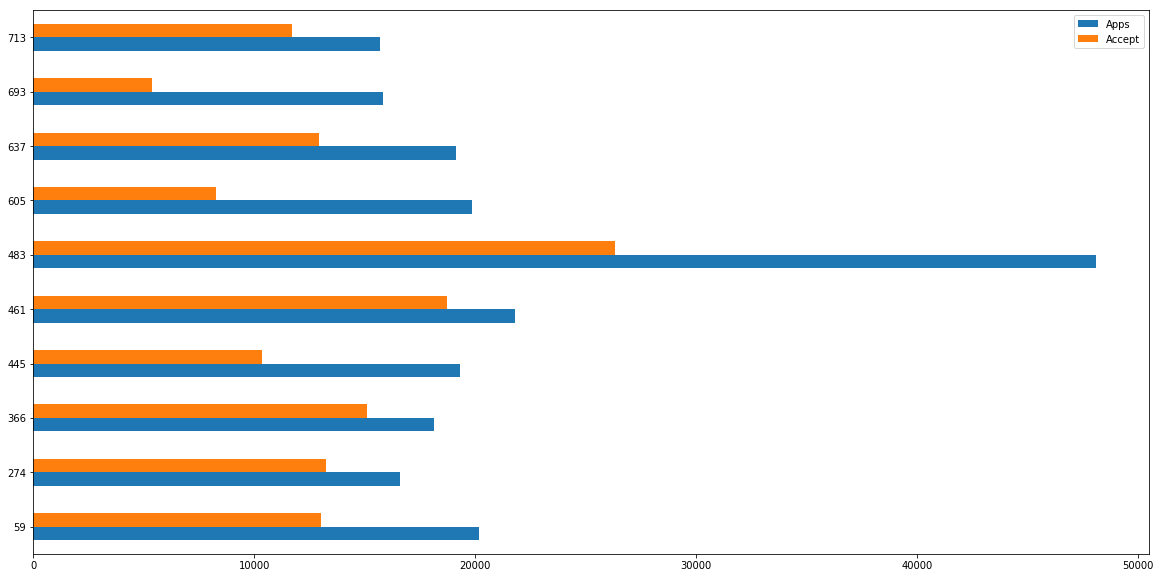

In [128]:
apps=apps[["Names","Apps","Accept"]]
apps.plot(kind='barh', figsize=(20,10))

In [129]:
## These are the colleges which receives more number of applications in that Rutgers at New Brunswick receives many apps.

In [130]:
apps['Perc_ACCEPT'] = (apps['Accept'] / apps['Apps']) *100
apps['Perc_ACCEPT'].sort_values()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


693    33.970598
605    41.523675
445    53.554232
483    54.746954
59     64.416601
637    67.564745
713    74.586303
274    79.839633
366    83.338854
461    85.965878
Name: Perc_ACCEPT, dtype: float64

In [131]:
## University of Virginia receivng 15849 applications in that they they are accepting only 33%.
## Rutgers at New Brunwseick reciving max number of application (48094) in that they are accepting only 26330 app 54%
## Purdue University at West Lafayette accepting more number of applications 85%. 

In [132]:
acc=edu["Accept"].sort_values(ascending = False).head(5)
acc

483    26330
461    18744
366    15096
274    13243
59     13007
Name: Accept, dtype: int64

In [133]:
array = [26330,18744,15096,13243,13007]
acce=edu.loc[edu['Accept'].isin(array)]
acce

Names   Apps  Accept  Enroll  Top10perc  \
59                     Boston University  20192   13007    3810         45   
274    Indiana University at Bloomington  16587   13243    5873         25   
366            Michigan State University  18114   15096    6180         23   
461  Purdue University at West Lafayette  21804   18744    5874         29   
483             Rutgers at New Brunswick  48094   26330    4520         36   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
59          80        14971         3113     18420        6810    475   
274         72        24763         2717      9766        3990    600   
366         57        26640         4120     10658        3734    504   
461         60        26213         4065      9556        3990    570   
483         79        21401         3712      7410        4748    690   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
59       1025   80        81       11.9           16   16836         72  
274      2000   77        88       21.3           24    8686         68  
366       600   93        95       14.0            9   10520         71  
461      1060   86        86       18.2           15    8604         67  
483      2009   90        95       19.5           19   10474         77

In [134]:
## Overall,Rutgers at New Brunwseick accepting more number of applications

In [135]:
enroll=edu["Enroll"].sort_values(ascending = False).head(5)
enroll

581    6392
366    6180
461    5874
274    5873
623    5705
Name: Enroll, dtype: int64

In [136]:
array = [6392,6180,5874,5873,5705]
enrolled=edu.loc[edu['Enroll'].isin(array)]
enrolled

Names   Apps  Accept  Enroll  Top10perc  \
274    Indiana University at Bloomington  16587   13243    5873         25   
366            Michigan State University  18114   15096    6180         23   
461  Purdue University at West Lafayette  21804   18744    5874         29   
581   Texas A&M Univ. at College Station  14474   10519    6392         49   
623      University of Illinois - Urbana  14939   11652    5705         52   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
274         72        24763         2717      9766        3990    600   
366         57        26640         4120     10658        3734    504   
461         60        26213         4065      9556        3990    570   
581         85        31643         2798      5130        3412    600   
623         88        25422          911      7560        4574    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
274      2000   77        88       21.3           24    8686         68  
366       600   93        95       14.0            9   10520         71  
461      1060   86        86       18.2           15    8604         67  
581      2144   89        91       23.1           29    8471         69  
623      1982   87        90       17.4           13    8559         81

In [137]:
## compared to other colleges More number of students enrolled in Texas A&M Univ(581). at College Station (6392).
 # Out of 777 colleges/Universities, 1.02% of students enrolled themselves in Texas A&M Univ(581). at College Station

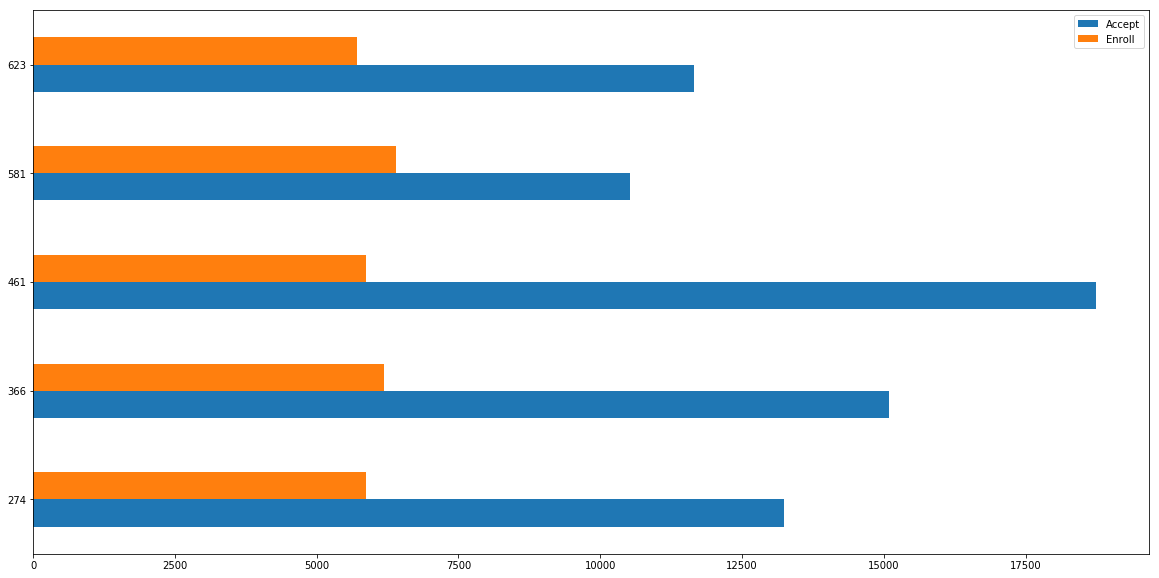

In [138]:
enrolled=enrolled[["Names","Accept","Enroll"]]
enrolled.plot(kind='barh', figsize=(20,10))


In [139]:
enroll=edu["Apps"].sort_values(ascending = True).head(5)
enroll

110     81
85     100
135    141
500    150
768    152
Name: Apps, dtype: int64

In [140]:
array = [35,46,51,55,55]
least_enrolled=edu.loc[edu['Enroll'].isin(array)]
least_enrolled

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
4    Alaska Pacific University   193     146      55         16         44   
85             Capitol College   100      90      35         10         52   
110        Christendom College    81      72      51         33         71   
135      College of St. Joseph   141     118      55         12         21   
764             Wilson College   167     130      46         16         50   

     F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
4            249          869      7560        4120    800      1500   76   
85           282          331      8400        2812    300      2134   10   
110          139            3      8730        3600    400       800   92   
135          201          173      8300        4850    450      1300   53   
764          199          676     11428        5084    450       475   67   

     Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
4          72       11.9            2   10922         15  
85         50       12.1           24    7976         52  
110        92        9.3           17   10922         58  
135        53        9.5           19    6936         76  
764        76        8.3           43   10291         67

In [141]:
## These are the colleges with lowest number of enrollements happened in the year.

In [142]:
Top=edu[["Names","Top10perc","Top25perc"]].groupby(["Names"]).sum()
Top["total"]=Top.Top10perc+Top.Top25perc
Top["total"].sort_values(ascending =False).head()

Names
University of California at Berkeley     195
Massachusetts Institute of Technology    195
Harvey Mudd College                      195
Yale University                          194
Harvard University                       190
Name: total, dtype: int64

In [143]:
Top10perc=edu["Top10perc"].sort_values(ascending = False).head(5)
Top10perc

354    96
775    95
251    95
605    95
174    90
Name: Top10perc, dtype: int64

In [144]:
array = [96,95,95,95,90]
Top10=edu.loc[edu['Top10perc'].isin(array)]
Top10

Names   Apps  Accept  Enroll  Top10perc  \
174                        Duke University  13789    3893    1583         90   
250                     Harvard University  13865    2165    1606         90   
251                    Harvey Mudd College   1377     572     178         95   
354  Massachusetts Institute of Technology   6411    2140    1078         96   
459                   Princeton University  13218    2042    1153         90   
605   University of California at Berkeley  19873    8252    3215         95   
775                        Yale University  10705    2453    1317         95   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
174         98         6188           53     18590        5950    625   
250        100         6862          320     18485        6410    500   
251        100          654            5     17230        6690    700   
354         99         4481           28     20100        5975    725   
459         98         4540          146     19900        5910    675   
605        100        19532         2061     11648        6246    636   
775         99         5217           83     19840        6510    630   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
174      1162   95        96        5.0           44   27206         97  
250      1920   97        97        9.9           52   37219        100  
251       900  100       100        8.2           46   21569        100  
354      1600   99        99       10.1           35   33541         94  
459      1575   91        96        8.4           54   28320         99  
605      1933   93        97       15.8           10   13919         78  
775      2115   96        96        5.8           49   40386         99

In [145]:
Top25perc=edu["Top25perc"].sort_values(ascending = False).head(10)
Top25perc

663    100
605    100
562    100
606    100
250    100
251    100
60     100
158     99
409     99
354     99
Name: Top25perc, dtype: int64

In [146]:
array = [100]
Top25=edu.loc[edu['Top25perc'].isin(array)]
Top25

Names   Apps  Accept  Enroll  Top10perc  \
60                        Bowdoin College   3356    1019     418         76   
250                    Harvard University  13865    2165    1606         90   
251                   Harvey Mudd College   1377     572     178         95   
562                       SUNY at Buffalo  15039    9649    3087         36   
605  University of California at Berkeley  19873    8252    3215         95   
606    University of California at Irvine  15698   10775    2478         85   
663            University of Pennsylvania  12394    5232    2464         85   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
60         100         1490            8     19030        5885   1495   
250        100         6862          320     18485        6410    500   
251        100          654            5     17230        6690    700   
562        100        13963         3124      6550        4731    708   
605        100        19532         2061     11648        6246    636   
606        100        12677          864     12024        5302    790   
663        100         9205          531     17020        7270    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
60        875   93        96       11.2           52   20447         96  
250      1920   97        97        9.9           52   37219        100  
251       900  100       100        8.2           46   21569        100  
562       957   90        97       13.6           15   11177         56  
605      1933   93        97       15.8           10   13919         78  
606      1818   96        96       16.1           11   15934         66  
663      1544   95        96        6.3           38   25765         93

In [147]:
## New students from top 10%  of Higher Secondary class mostly joined in 1) University of California at Berkeley
## 2) Massachusetts Institute of Technology 3) Harvey Mudd College 4) Yale University 5) Harvard University

In [148]:
Undergrad=edu["F.Undergrad"].sort_values(ascending = False).head(5)
Undergrad

581    31643
685    30017
445    28938
69     27378
366    26640
Name: F.Undergrad, dtype: int64

In [149]:
array = [31643,30017,28938,27378,26640]
under=edu.loc[edu['F.Undergrad'].isin(array)]
under

Names   Apps  Accept  Enroll  Top10perc  \
69      Brigham Young University at Provo   7365    5402    4615         48   
366             Michigan State University  18114   15096    6180         23   
445  Pennsylvania State Univ. Main Campus  19315   10344    3450         48   
581    Texas A&M Univ. at College Station  14474   10519    6392         49   
685         University of Texas at Austin  14752    9572    5329         48   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
69          82        27378         1253      2340        3580    860   
366         57        26640         4120     10658        3734    504   
445         93        28938         2025     10645        4060    512   
581         85        31643         2798      5130        3412    600   
685         85        30017         5189      5130        3309    650   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
69       1220   76        76       20.5           40    7916         33  
366       600   93        95       14.0            9   10520         71  
445      2394   77        96       18.1           19    8992         63  
581      2144   89        91       23.1           29    8471         69  
685      3140   91        99       19.7           11    7837         65

In [150]:
PoUndergrad=edu["P.Undergrad"].sort_values(ascending = False).head(5)
PoUndergrad

640    21836
676    10962
418    10221
201     9310
223     9054
Name: P.Undergrad, dtype: int64

In [151]:
array = [21836,10962,10221,9310,9054]
under=edu.loc[edu['P.Undergrad'].isin(array)]
under

Names   Apps  Accept  Enroll  Top10perc  \
201     Florida International University   3306    2079    1071         42   
223             Georgia State University   3793    2341    1238          9   
418              Northeastern University  11901    8492    2517         16   
640  University of Minnesota Twin Cities  11054    6397    3524         26   
676          University of South Florida   7589    4676    1876         29   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
201         89        10208         9310      6597        2494    800   
223         24         7732         9054      6744        2655    720   
418         42        11160        10221     13380        7425    600   
640         55        16502        21836      8949        3744    714   
676         63        14770        10962      6760        3776    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
201      3028   81        96       13.9           20    6722         66  
223      3450   87        89       19.0           10    7762         34  
418      1750   73        82       12.9           17    9563         46  
640      2910   88        90       12.2           37   16122         45  
676      2180   84        89       17.0            7   11020         47

In [152]:
## Texas A&M Univ. at College Station & University of Texas at Austin has more number of full time under graduate students.
## But these colleges did n't have much number of part time students.

In [153]:
## University of Minnesota Twin Citie has more number of part time students.

In [154]:
outst=edu["Outstate"].sort_values(ascending = False).head(5)
outst

47     21700
354    20100
225    19964
469    19960
459    19900
Name: Outstate, dtype: int64

In [155]:
array = [21700,20100,19964,19960,19900]
out=edu.loc[edu['Outstate'].isin(array)]
out

Names   Apps  Accept  Enroll  Top10perc  \
47                      Bennington College    519     327     114         25   
225                     Gettysburg College   3596    2466     575         42   
354  Massachusetts Institute of Technology   6411    2140    1078         96   
459                   Princeton University  13218    2042    1153         90   
469                           Reed College   1966    1436     327         47   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
47          53          457            2     21700        4100    600   
225         78         1944           46     19964        4328    500   
354         99         4481           28     20100        5975    725   
459         98         4540          146     19900        5910    675   
469         80         1199           61     19960        5490    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
47        500   35        59       10.1           33   16364         55  
225       500   94        95       12.1           32   14720         83  
354      1600   99        99       10.1           35   33541         94  
459      1575   91        96        8.4           54   28320         99  
469       450   90        90       11.8           37   15886         68

In [156]:
## Massachusetts Institute of Technology have many out of station students in this list.

In [157]:
edu["Total_Cost"]=edu["Room.Board"]+edu["Books"]+edu["Personal"]
total=edu["Total_Cost"].sort_values(ascending = False).head(5)
total

497    12330
317    10000
418     9775
368     9733
671     9652
Name: Total_Cost, dtype: int64

In [158]:
array = [12330,10000,9775,9733,9652]
tot=edu.loc[edu['Total_Cost'].isin(array)]
tot

Names   Apps  Accept  Enroll  Top10perc  Top25perc  \
317           Lindenwood College    810     484     356          6         33   
368  MidAmerica Nazarene College    331     331     225         15         36   
418      Northeastern University  11901    8492    2517         16         42   
497       Saint Louis University   3294    2855     956         44         67   
671  University of San Francisco   2306    1721     538         23         48   

     F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
317         2155          191      9200        4800   1000      4200   65   
368         1100          166      6840        3720   1100      4913   33   
418        11160        10221     13380        7425    600      1750   73   
497         4576         1140     11690        4730    800      6800   84   
671         4309          549     13226        6452    750      2450   86   

     Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Total_Cost  
317        85       24.1            9    3480        100       10000  
368        33       15.4           20    5524         49        9733  
418        82       12.9           17    9563         46        9775  
497        94        4.6           19   18367         67       12330  
671        86       13.6            8   10074         62        9652

In [159]:
## ## Students who are studying in 1st Saint Louis University & 2nd Lindenwood College are spending more compared to other colleges.

In [160]:
exp=edu["Expend"].sort_values(ascending = True).head(5)
exp

280    3186
105    3365
317    3480
585    3605
703    3733
Name: Expend, dtype: int64

In [161]:
array = [56233,45702,42926,41766,40386]
exp=edu.loc[edu['Expend'].isin(array)]
exp

Names   Apps  Accept  Enroll  Top10perc  Top25perc  \
20         Antioch University    713     661     252         25         44   
284  Johns Hopkins University   8474    3446     911         75         94   
720    Wake Forest University   5661    2392     903         75         88   
728     Washington University   7654    5259    1254         62         93   
775           Yale University  10705    2453    1317         95         99   

     F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
20           712           23     15476        3336    400      1100   69   
284         3566         1569     18800        6740    500      1040   96   
720         3499          172     13850        4360    500      1250   95   
728         4879         1274     18350        5775    768      1512   91   
775         5217           83     19840        6510    630      2115   96   

     Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Total_Cost  
20         82       11.3           35   42926         48        4836  
284        97        3.3           38   56233         90        8280  
720        97        4.3           37   41766         89        6110  
728        98        3.9           31   45702         90        8055  
775        96        5.8           49   40386         99        9255

In [162]:
array = [3186,3365,3480,3605,3733]
exp=edu.loc[edu['Expend'].isin(array)]
exp

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
105   Central Wesleyan College   174     146      88          8         29   
280          Jamestown College   472     410     262         14         41   
317         Lindenwood College   810     484     356          6         33   
585  Texas Southern University  4345    3245    2604         15         85   
703      Upper Iowa University   663     452     192         10         35   

     F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
105         1047           33      8300        3080    600       600   62   
280         9950           71      7620        3050    400       400   51   
317         2155          191      9200        4800   1000      4200   65   
585         5584         3101      7860        3360    600      1700   65   
703         1481         1160      8840        3060    500      1000   69   

     Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Total_Cost  
105        62       15.2           18    3365         58        4280  
280        53       17.0           21    3186         54        3850  
317        85       24.1            9    3480        100       10000  
585        75       18.2           21    3605         10        5660  
703        75       17.4           19    3733         78        4560

In [163]:
## Johns Hopkins University spending more amount to the student and their Gradutation rate was 90%. And in this list Antioch University
## spending around 42926 and Graduation rate is only  48%.
## The Instructional expenditure of Lindenwood College was only 3480 but their Grad.Rate is 100%

In [164]:
phd=edu["PhD"].sort_values(ascending = False).head(5)
phd

582    103
71     100
251    100
453    100
609     99
Name: PhD, dtype: int64

In [165]:
array = [103,99,100]
phd=edu.loc[edu['PhD'].isin(array)]
phd

Names   Apps  Accept  Enroll  \
70                           Brown University  12586    3239    1462   
71                          Bryn Mawr College   1465     810     313   
114                 Claremont McKenna College   1860     767     227   
251                       Harvey Mudd College   1377     572     178   
256         Hobart and William Smith Colleges   2688    2081     500   
354     Massachusetts Institute of Technology   6411    2140    1078   
406  New Mexico Institute of Mining and Tech.    787     601     233   
453                            Pitzer College   1133     630     220   
582         Texas A&M University at Galveston    529     481     243   
609                     University of Chicago   6348    2999     922   

     Top10perc  Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  \
70          87         95         5643          349     19528        5926   
71          71         95         1088           16     18165        6750   
114         71         93          887            1     17000        6010   
251         95        100          654            5     17230        6690   
256         25         53         1792            5     19029        5841   
354         96         99         4481           28     20100        5975   
406         40         73         1017          411      5376        3214   
453         37         73          750           30     17688        5900   
582         22         47         1206          134      4860        3122   
609         68         94         3340           39     18930        6380   

     Books  Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  \
70     720      1100   99       100        7.6           39   20440   
71     500      1200  100       100       12.3           49   17449   
114    500       850   99        99        9.6           52   18443   
251    700       900  100       100        8.2           46   21569   
256    600       600   99        99       12.1           37   13040   
354    725      1600   99        99       10.1           35   33541   
406    600      1100   99       100       13.7           11    9241   
453    650       850  100       100       10.4           11   14820   
582    600       650  103        88       17.4           16    6415   
609    500      1254   99        99        5.3           36   36854   

     Grad.Rate  Total_Cost  
70          97        7746  
71          89        8450  
114         87        7360  
251        100        8290  
256         79        7041  
354         94        8300  
406         34        4914  
453         73        7400  
582         43        4372  
609         90        8134

In [166]:
## Texas A&M University at Galveston has more number of Phd fac(103) but their Grad.Rate is 43%. But with 99 phd facu Brown Universities Grad.rate is 97 

In [167]:
alum=edu["perc.alumni"].sort_values(ascending = False).head(5)
alum

763    64
16     63
86     60
242    60
106    60
Name: perc.alumni, dtype: int64

In [168]:
array = [64,63,60]
alum=edu.loc[edu['perc.alumni'].isin(array)]
alum

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
16    Amherst College  4302     992     418         83         96   
86   Carleton College  2694    1579     489         75         93   
106    Centre College  1013     888     288         55         82   
242  Hamilton College  3140    1783     454         40         82   
763  Williams College  4186    1245     526         81         96   

     F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
16          1593            5     19760        5300    660      1598   93   
86          1870           12     19292        3957    550       550   81   
106          943            7     11850        4270    600       900   95   
242         1646           24     19700        5050    300       800   91   
763         1988           29     19629        5790    500      1200   94   

     Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Total_Cost  
16         98        8.4           63   21424        100        7558  
86         93       10.4           60   17960         91        5057  
106        99       11.4           60   13118         74        5770  
242        96        9.6           60   17761         91        6150  
763        99        9.0           64   22014         99        7490

In [169]:
## compared to other colleges Williams College gets more donations from their aluminis.
## collges/universities which got more donations from thier aluminis having good Grad.Rate and they are having good number
### of Phd faculties and faculties with terminal degrees.

In [170]:
alum=edu["perc.alumni"].sort_values(ascending = True).head(5)
alum

104    0
678    0
457    1
699    1
4      2
Name: perc.alumni, dtype: int64

In [171]:
array = [0,1,2,3,4,5]
alum=edu.loc[edu['perc.alumni'].isin(array)]
alum

Names   Apps  Accept  Enroll  \
4                  Alaska Pacific University    193     146      55   
19                   Angelo State University   3540    2001    1016   
23      Arizona State University Main campus  12809   10308    3761   
25                  Arkansas Tech University   1734    1729     951   
57                         Bluefield College    377     358     181   
100              Center for Creative Studies    601     396     203   
102     Central Connecticut State University   4158    2532     902   
103        Central Missouri State University   4681    4101    1436   
104            Central Washington University   2785    2011    1007   
142                      Columbia College MO    314     158     132   
154                       Cumberland College    995     789     398   
168            Dominican College of Blauvelt    360     329     108   
181              Eastern Illinois University   5597    4253    1565   
189     Embry Riddle Aeronautical University   3151    2584     958   
192                 Emporia State University   1256    1256     853   
226                    Goldey Beacom College    633     468     284   
264                         Huron University    600     197     124   
265                           Husson College    723     652     361   
384                Montreat-Anderson College    263     223     103   
403                National-Louis University    513     347     279   
444                Pembroke State University    944     774     440   
457        Prairie View A. and M. University   2405    2234    1061   
490                 Saint Francis College IN    213     166      85   
630           University of Maine at Machias    441     369     172   
645                     University of Mobile    452     331     269   
672  University of Sci. and Arts of Oklahoma    285     280     208   
674    University of South Carolina at Aiken    848     560     377   
678          University of Southern Colorado   1401    1239     605   
684         University of Texas at Arlington   3281    2559    1448   
686       University of Texas at San Antonio   4217    3100    1686   
699     University of Wisconsin at Green Bay   2409    1939     759   
717                         Voorhees College   1465    1006     188   
731                           Webber College    280     143      79   
745        Western State College of Colorado   2702    1623     604   

     Top10perc  Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  \
4           16         44          249          869      7560        4120   
19          24         54         4190         1512      5130        3592   
23          24         49        22593         7585      7434        4850   
25          12         52         3602          939      3460        2650   
57          15         30          653          129      7150        4350   
100          1         20          525          323     11230        6643   
102          6         24         6394         3881      5962        4444   
103         10         35         8094         1596      4620        3288   
104          8         65         6507          898      7242        3603   
142         10         28          690         5346      8294        3700   
154         26         47         1306          122      6230        3526   
168          4         19          756          863      8310        5500   
181         12         38         9161          845      5710        3066   
189         14         40         4772          856      7800        3750   
192         43         79         3957          588      5401        3144   
226         10         27          823          963      6120        2985   
264          3          9          392           69      7260        3090   
265         10         30          951          706      7800        4000   
384         10         24          316           20      8438        3372   
403         2

In [172]:
##
## Colleges/Universites which are getting lower rate of donation from their aluminis didn't have good Grad.rate and they 
 # didn't have much amount of Phd faculties. And mostly their expenditure rate also very less.

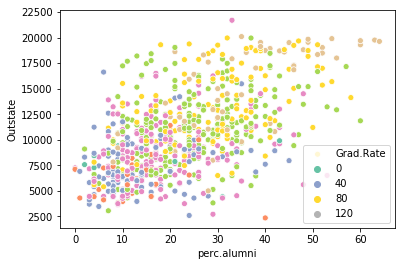

In [363]:
sns.scatterplot(edu['perc.alumni'], edu['Outstate'], hue=edu['Grad.Rate'], palette='Set2') 

In [ ]:
## This plot shows us colleges/uni which are getting more donations also have good graduation rate and these colleges many students from outstate.

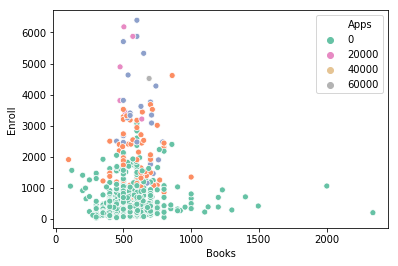

In [365]:
sns.scatterplot(edu['Books'], edu['Enroll'], hue=edu['Apps'], palette='Set2') 

In [366]:
## Colleges which are getting more amounts for books from students are getting lesser applications and enrollements. 
  # This tells that students dont prefer the colleges which are asking more amount for books

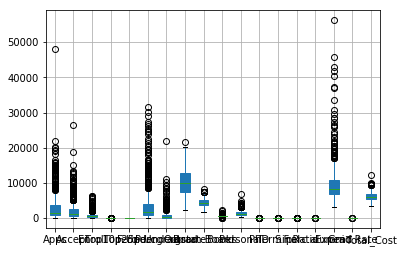

In [173]:
edu.boxplot(patch_artist=True)

In [367]:
edu["Grad"]=pd.cut(edu["Grad.Rate"],bins=[0,40,70,float("Inf")],labels=["Low_gd","Medium_gd","High_gd"])
edu["Grad"].value_counts()

Medium_gd    420
High_gd      300
Low_gd        57
Name: Grad, dtype: int64

In [ ]:
## It shows many colleges have medium_graduation rate.

In [368]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [369]:
edu2=edu.drop(['Names',"Total_Cost","Grad"], axis =1)
edu2.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate      rank  Ranking  
0           12    7041         60 -1.691119    644.0  
1           16   10527         56 -1.046129    539.0  
2           30    8735         54 -0.641042    456.0  
3           37   19016         59  2.805995     60.0  
4            2   10922         15 -2.154492    688.0

In [354]:
## I have used the standardScaler method which helps to standaridze all my data into single units and which helps to 
## identify and replace the  outliers. Which tranforms all the columns with same units with the mean value equals to zero & S.D to one

In [355]:
from scipy.stats import zscore
edu2=edu2.apply(zscore)
edu2.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

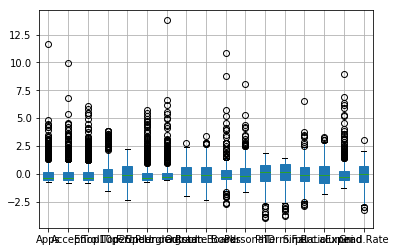

In [180]:
edu2.boxplot(patch_artist=True)

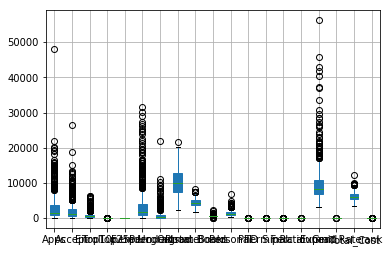

In [255]:
edu.boxplot(patch_artist=True)

In [ ]:
## Before and after Scaling outliers for variables remains the same it shows that it only standardize the variables and 
 # captures the variances correctly.

In [181]:
Q1 = edu2.quantile(0.25)
Q3 = edu2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Apps           0.736353
Accept         0.742998
Enroll         0.710764
Top10perc      1.134494
Top25perc      1.414711
F.Undergrad    0.621583
P.Undergrad    0.573137
Outstate       1.394131
Room.Board     1.325741
Books          0.787883
Personal       1.256215
PhD            1.409517
Terminal       1.427321
S.F.Ratio      1.263966
perc.alumni    1.453509
Expend         0.781656
Grad.Rate      1.456312
dtype: float64


In [182]:
edu5 = edu2.copy()

# Replace the outlier with lower whisker
for i, j in zip(np.where(edu5 < Q1 - 1.5 * IQR)[0], np.where(edu5 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    edu5.iloc[i,j] = whisker[j]
    
    
#Replace the outlier with upper whisker    
for i, j in zip(np.where(edu5 > Q3 + 1.5 * IQR)[0], np.where(edu5 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    edu5.iloc[i,j] = whisker[j]

In [183]:
edu5.shape, edu2.shape

((777, 17), (777, 17))

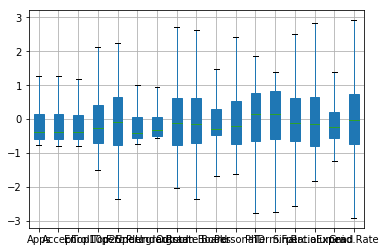

In [184]:
edu5.boxplot(patch_artist=True)

In [250]:
edu2.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [254]:
edu2.cov()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S.F.Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc.alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad.Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F.Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P.Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room.Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S.F.Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc.alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad.Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F.Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P.Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room.Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S.F.Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc.alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

In [ ]:
## After scaling values of  the correlation and covariance matrix captures the variances correctly and there is no much differences 
 # between them.

E:\anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


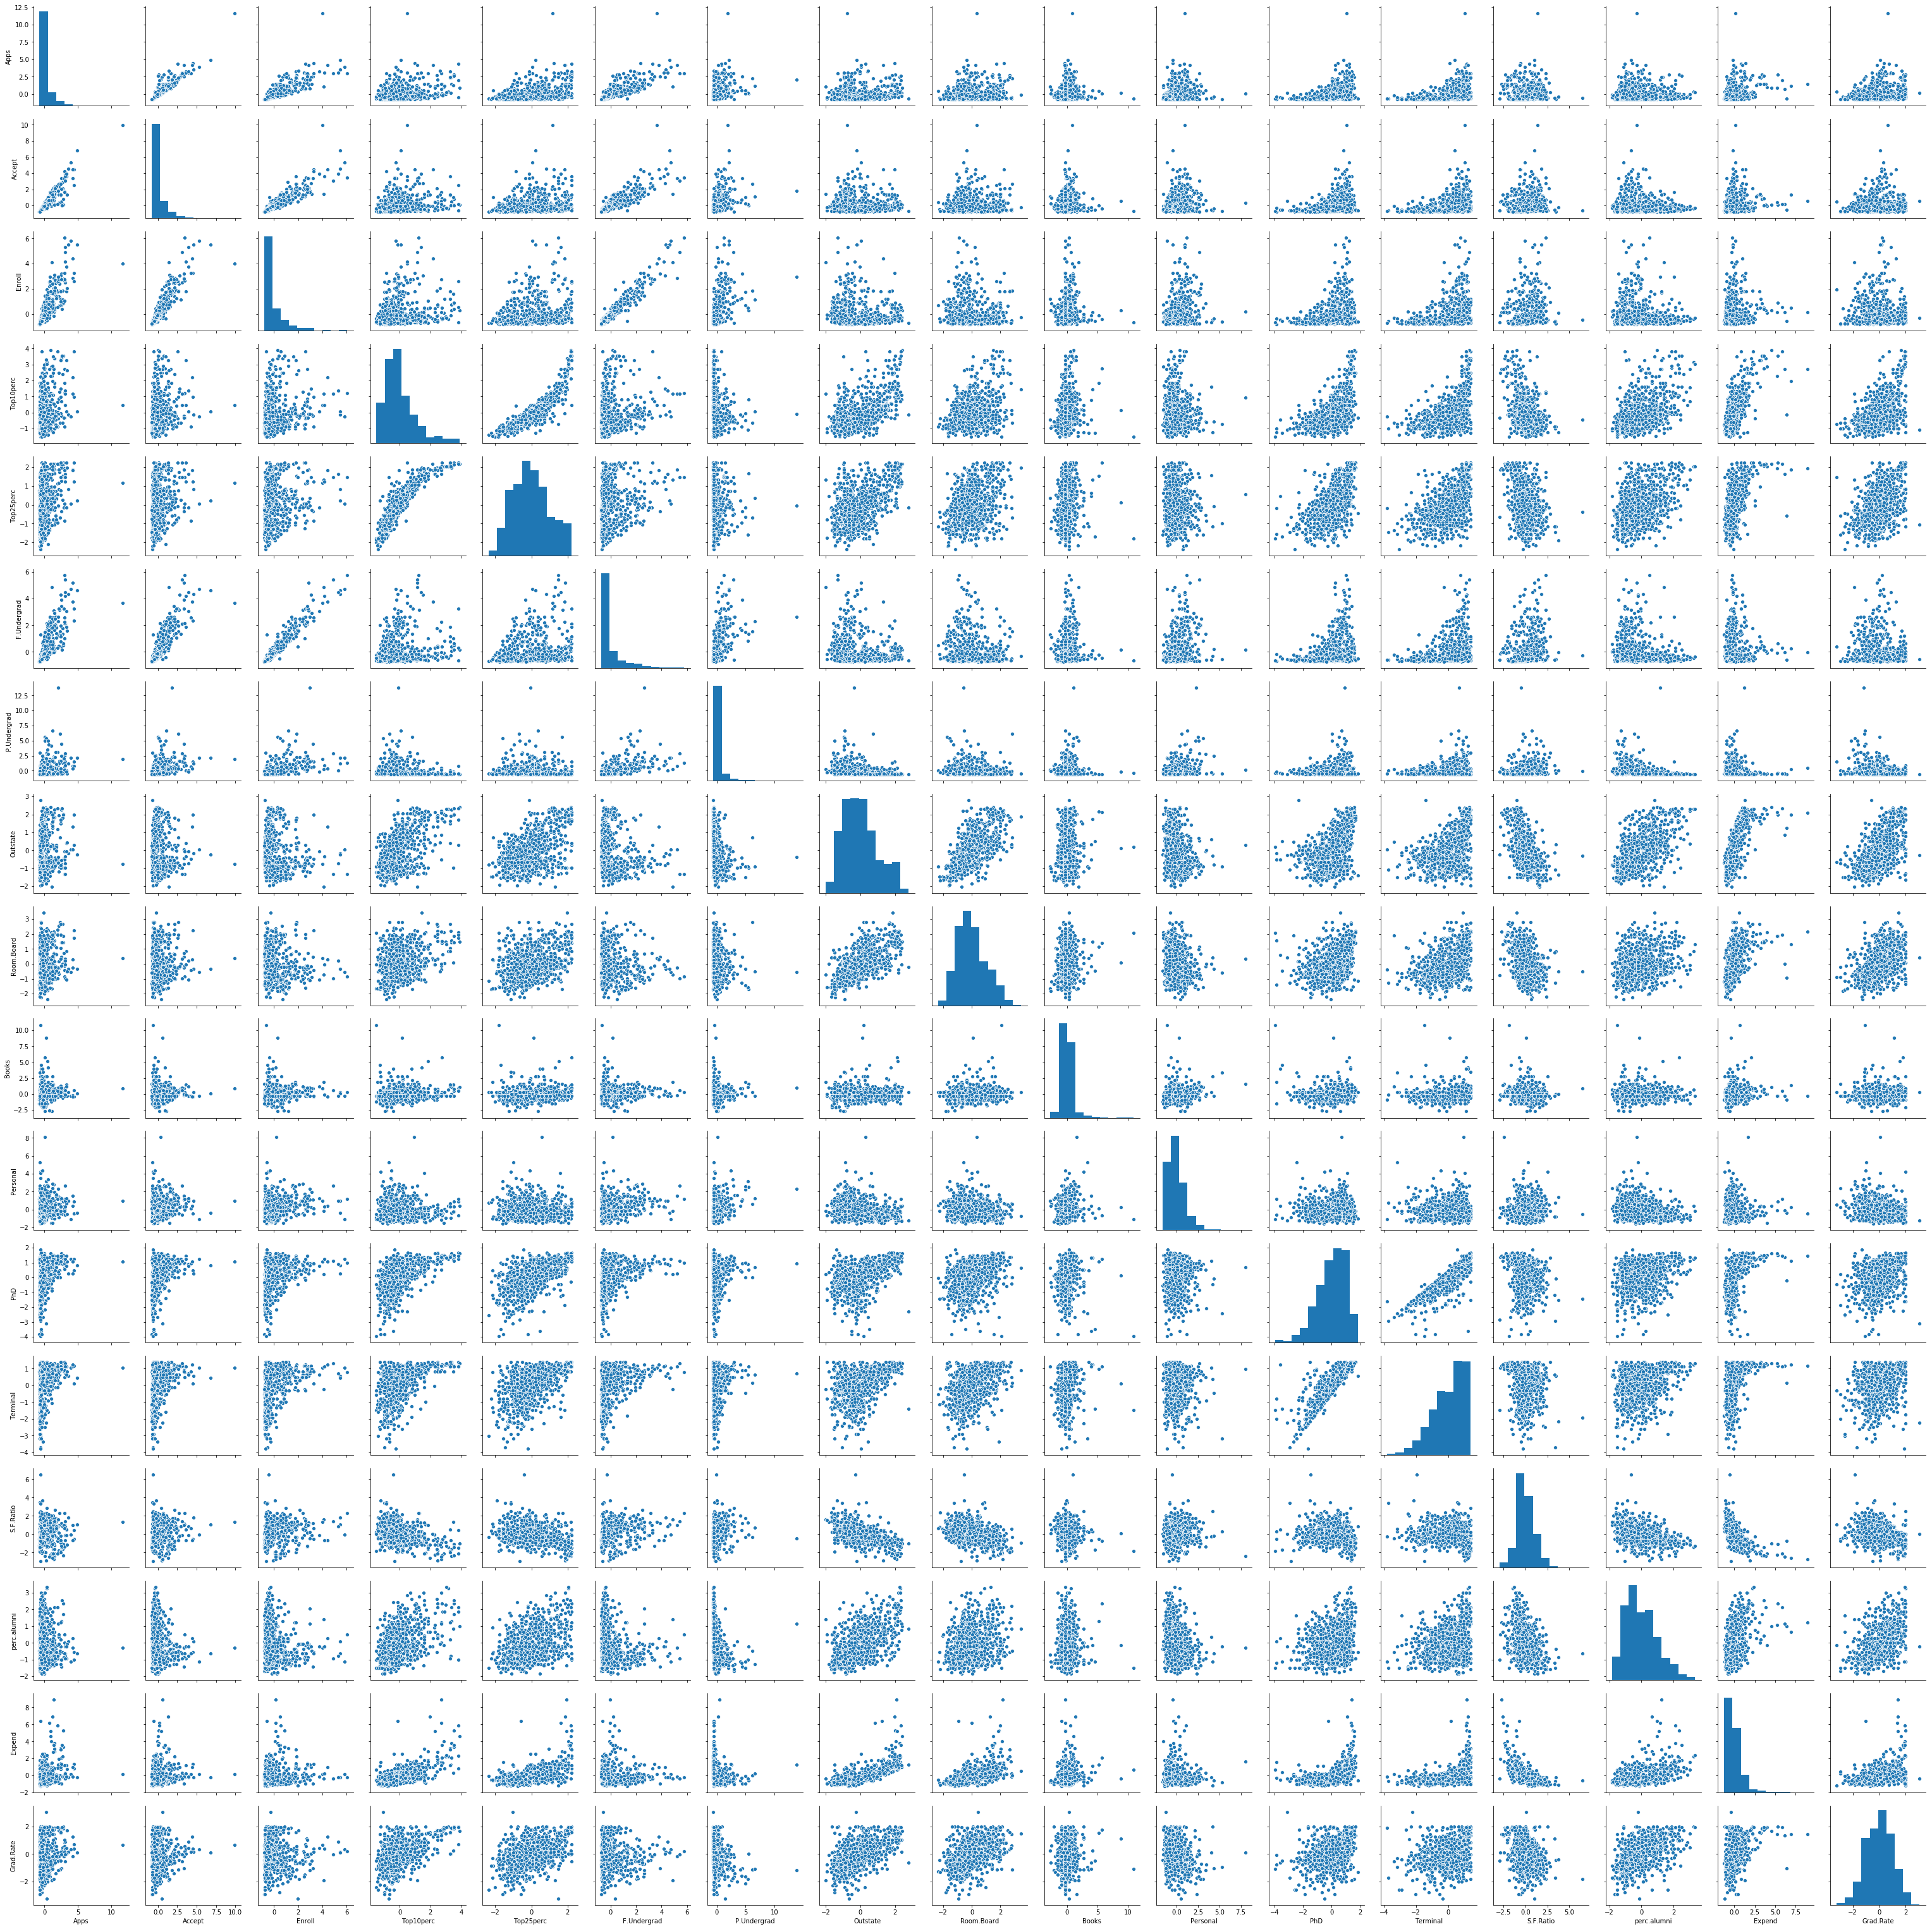

In [187]:
sns.pairplot(edu2, size = 2.5)
plt.show();

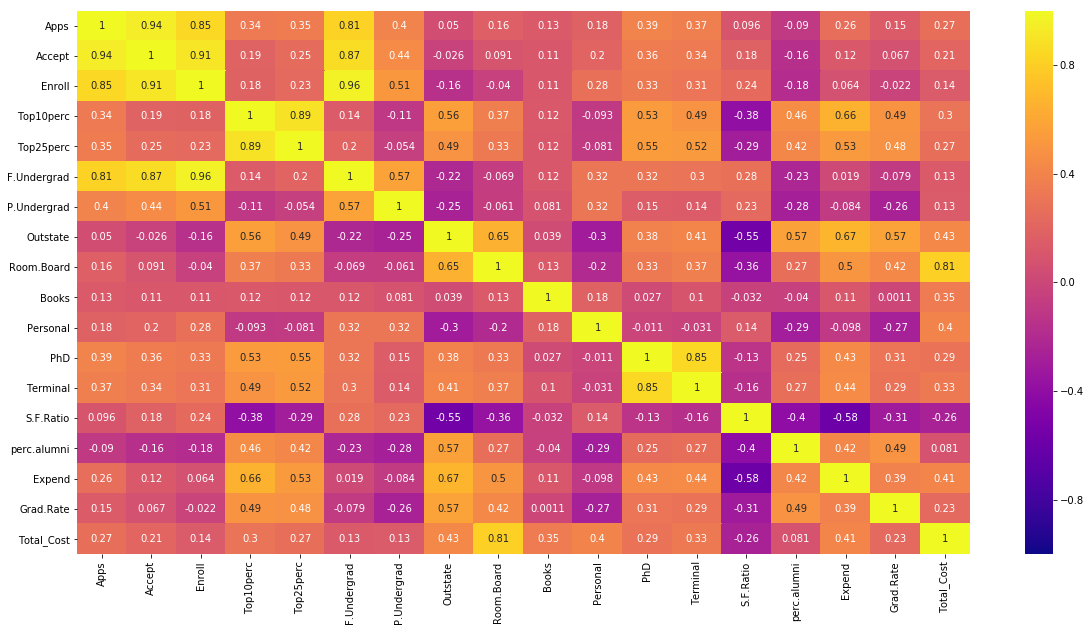

In [188]:
eud_corr=edu.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(eud_corr,annot=True,cmap="plasma",vmin=-1,vmax=1)

    If we look at the heatmap above:

1) Apps and Accept show high correlation. More the application , more the Accepts. Furthermore, both seem to have a similar (and relatively high) correlation with ‘Enroll’ and "F-undergrad". This shows a clear case of multicollinearity. Thus we can remove one of them and retain the other.(I am going to remove Accept,Enroll and F-unergrad)

2) Furthermore, ‘Top10perc’ and ‘Top25perc’ show high correlation again indicating multicollinearity and i am going to remove (Top10per) since it has some decent amount of correlation with expend.

3) It seems that Outstate  have descent amount of  correlation with Room Board, per alumni, Expend and Grad.rate.

4) If we have seen the pair plot "Phd" and "terminal" have linear realtionship and strong correlation. Compared to terminal
   "phd" have little bit high correlation with all other variables. So i going to remove Phd.

5) I am going to remove all these highly correlated columns
   (Accept,Enroll,F-undergrad,Top10perc,Outstate,Phd,Total_cost)
   
   I have removed all these columns because all these independent variables having high correlation with each other it may 
   leads biased in our final result.

In [189]:
edu_multi=edu.drop(['Names',"Total_Cost","Grad","Accept","Enroll","F.Undergrad","Top10perc","Outstate","PhD"], axis =1)
edu_multi.head()

Apps  Top25perc  P.Undergrad  Room.Board  Books  Personal  Terminal  \
0  1660         52          537        3300    450      2200        78   
1  2186         29         1227        6450    750      1500        30   
2  1428         50           99        3750    400      1165        66   
3   417         89           63        5450    450       875        97   
4   193         44          869        4120    800      1500        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

In [190]:
edu_multi.corr()

Apps  Top25perc  P.Undergrad  Room.Board     Books  Personal  \
Apps         1.000000   0.351640     0.398264    0.164939  0.132559  0.178731   
Top25perc    0.351640   1.000000    -0.053577    0.331490  0.115527 -0.080810   
P.Undergrad  0.398264  -0.053577     1.000000   -0.061326  0.081200  0.319882   
Room.Board   0.164939   0.331490    -0.061326    1.000000  0.127963 -0.199428   
Books        0.132559   0.115527     0.081200    0.127963  1.000000  0.179295   
Personal     0.178731  -0.080810     0.319882   -0.199428  0.179295  1.000000   
Terminal     0.369491   0.524749     0.141904    0.374540  0.099955 -0.030613   
S.F.Ratio    0.095633  -0.294629     0.232531   -0.362628 -0.031929  0.136345   
perc.alumni -0.090226   0.417864    -0.280792    0.272363 -0.040208 -0.285968   
Expend       0.259592   0.527447    -0.083568    0.501739  0.112409 -0.097892   
Grad.Rate    0.146755   0.477281    -0.257001    0.424942  0.001061 -0.269344   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.583832     0.417712  1.000000   0.390343  
Grad.Rate    0.289527  -0.306710     0.490898  0.390343   1.000000

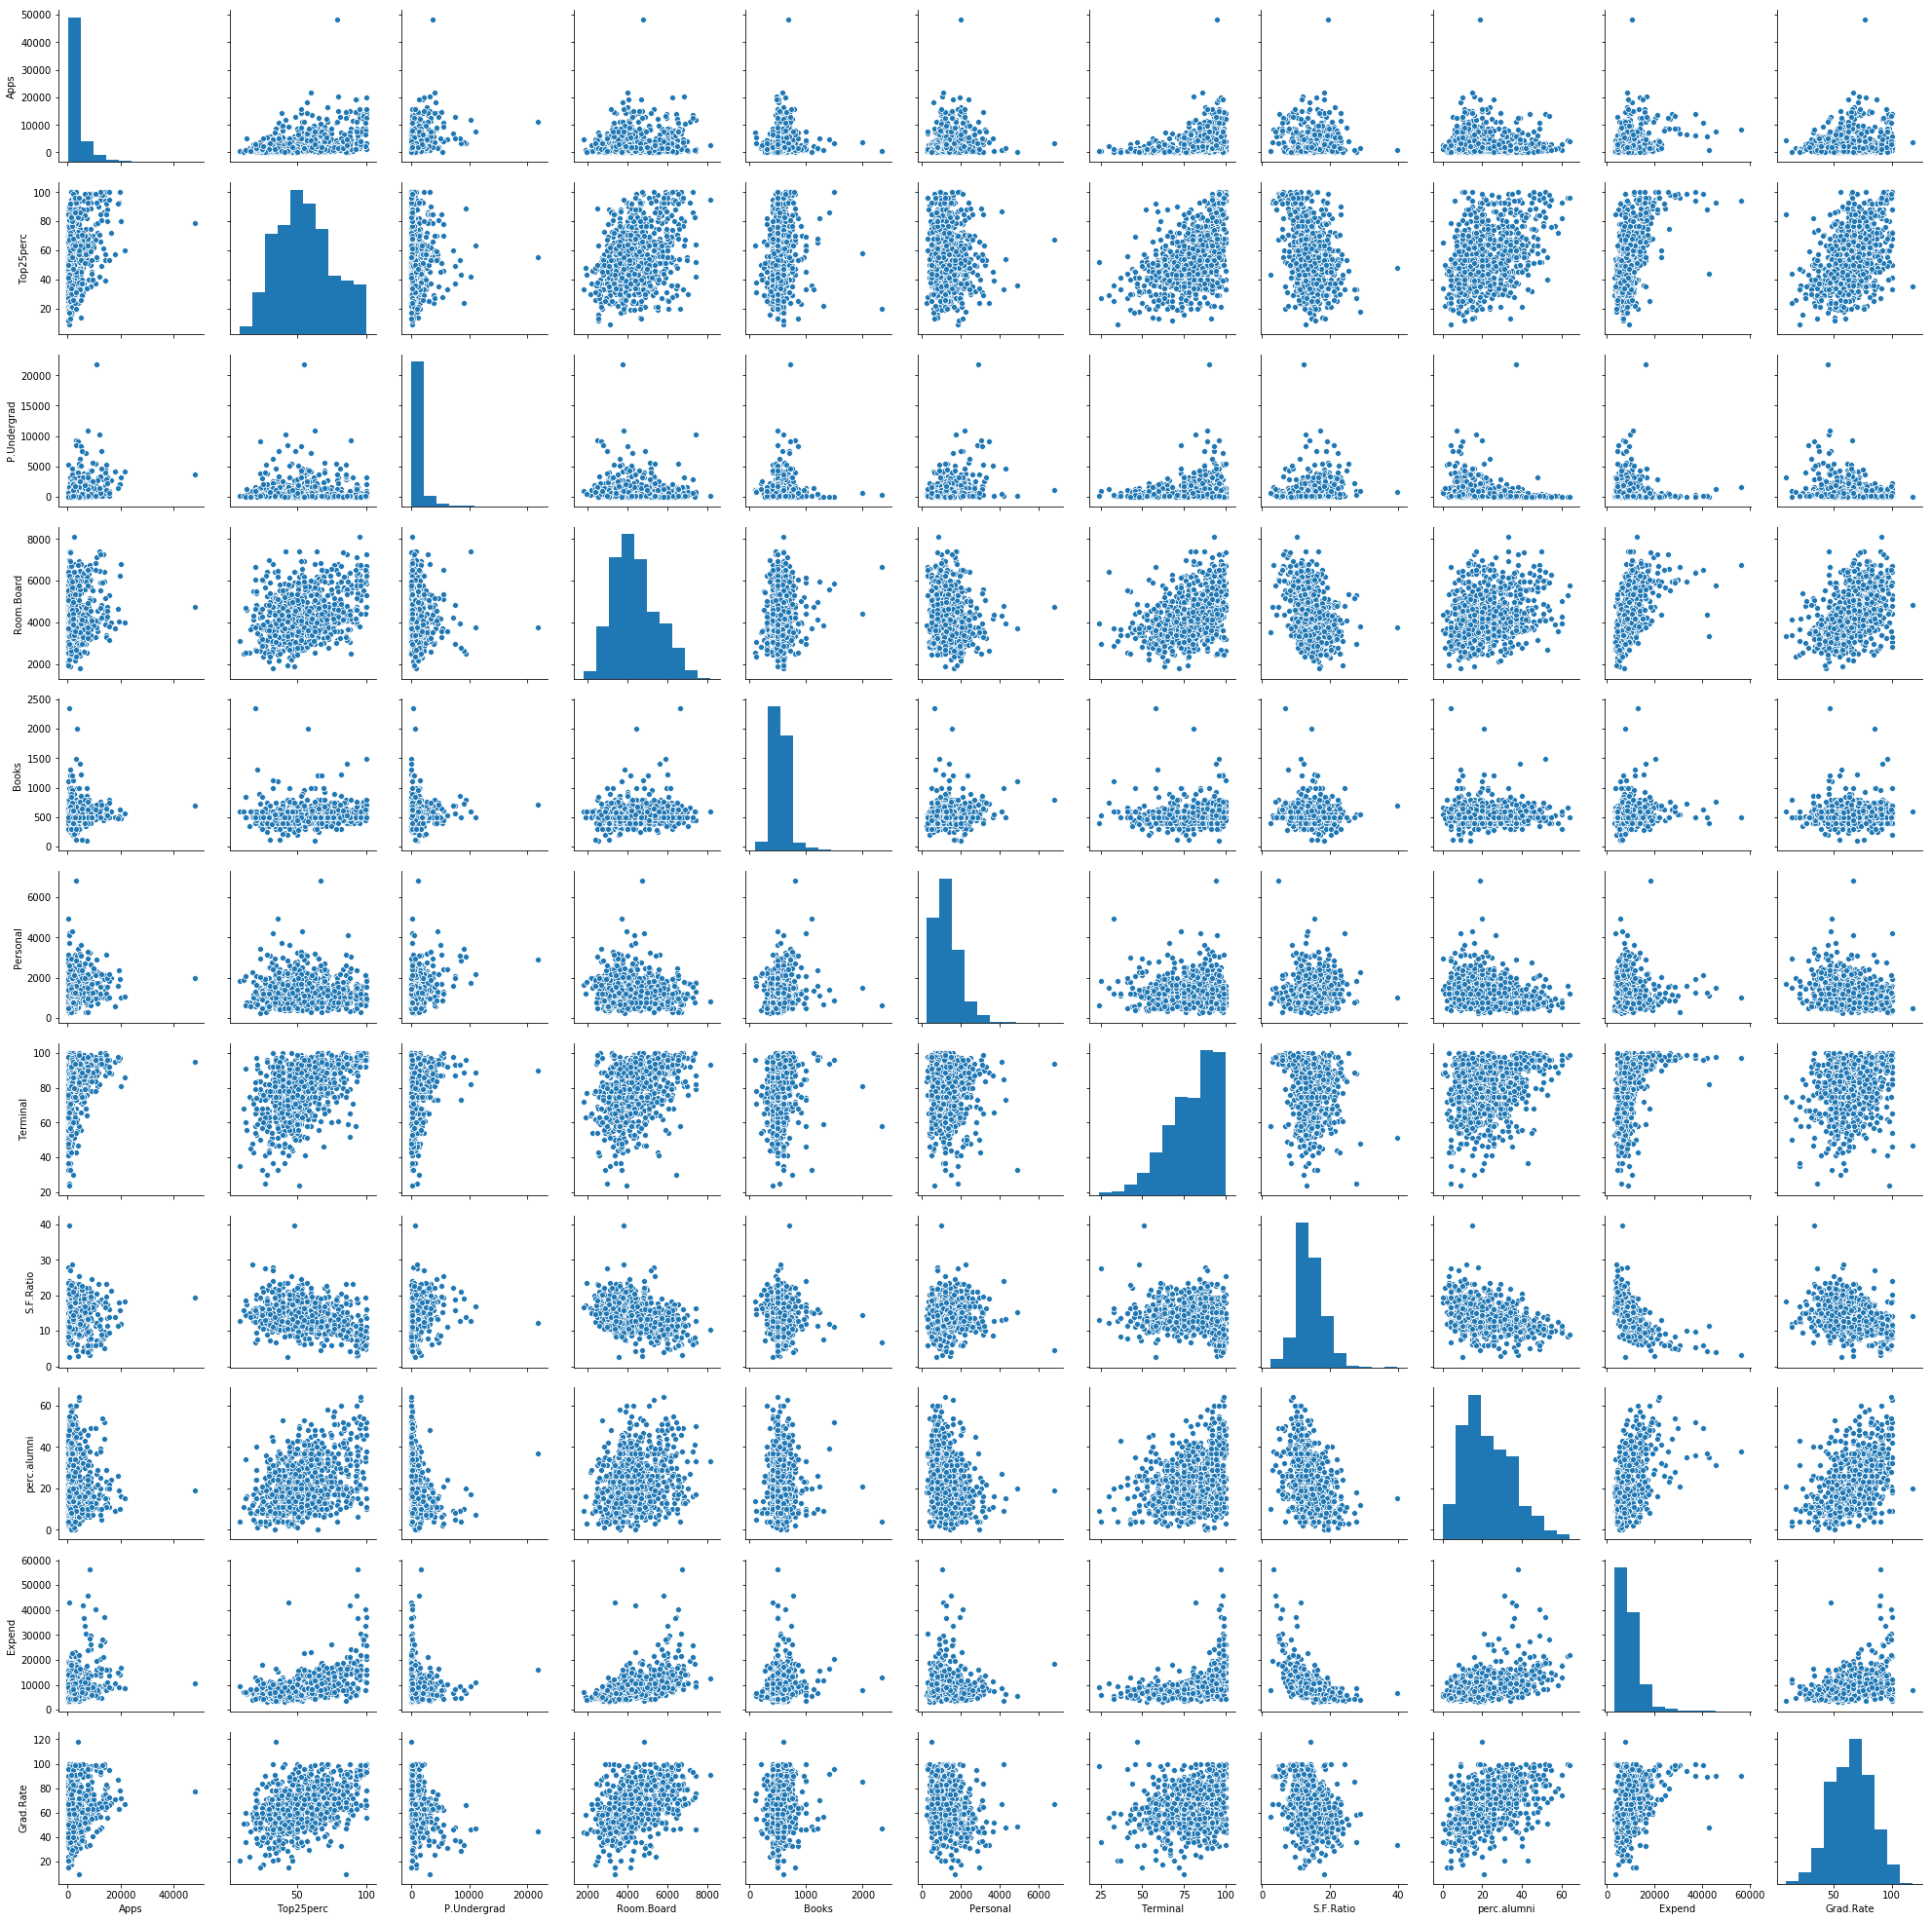

In [191]:
sns.pairplot(edu_multi, size = 2.5)
plt.show();

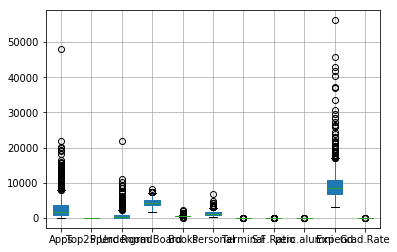

In [192]:
edu_multi.boxplot(patch_artist=True)

In [193]:
from scipy.stats import zscore
eduZ=edu_multi.apply(zscore)
eduZ.head()

Apps  Top25perc  P.Undergrad  Room.Board     Books  Personal  Terminal  \
0 -0.346882  -0.191827    -0.209207   -0.964905 -0.602312  1.270045 -0.115729   
1 -0.210884  -1.353911     0.244307    1.909208  1.215880  0.235515 -3.378176   
2 -0.406866  -0.292878    -0.497090   -0.554317 -0.905344 -0.259582 -0.931341   
3 -0.668261   1.677612    -0.520752    0.996791 -0.602312 -0.688173  1.175657   
4 -0.726176  -0.596031     0.009005   -0.216723  1.518912  0.235515 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [194]:
eduo = eduZ[~((eduZ < (Q1 - 1.5 * IQR)) |(eduZ > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
eduo.shape

(567, 11)

In [195]:
Q1 = eduZ.quantile(0.25)
Q3 = eduZ.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Apps           0.736353
Top25perc      1.414711
P.Undergrad    0.573137
Room.Board     1.325741
Books          0.787883
Personal       1.256215
Terminal       1.427321
S.F.Ratio      1.263966
perc.alumni    1.453509
Expend         0.781656
Grad.Rate      1.456312
dtype: float64


In [197]:
edu_outl = eduZ.copy()

# Replace the outlier with lower whisker
for i, j in zip(np.where(edu_outl < Q1 - 1.5 * IQR)[0], np.where(edu_outl < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    edu_outl.iloc[i,j] = whisker[j]
    
    
#Replace the outlier with upper whisker    
for i, j in zip(np.where(edu_outl > Q3 + 1.5 * IQR)[0], np.where(edu_outl > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    edu_outl.iloc[i,j] = whisker[j]

In [198]:
edu_outl.shape, eduZ.shape

((777, 11), (777, 11))

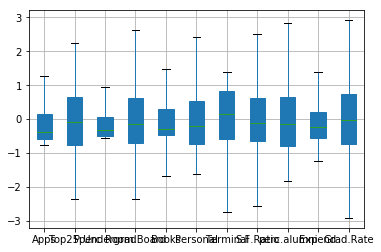

In [199]:
edu_outl.boxplot(patch_artist=True)

In [276]:
edu_outl.head()

Apps  Top25perc  P.Undergrad  Room.Board     Books  Personal  Terminal  \
0 -0.346882  -0.191827    -0.209207   -0.964905 -0.602312  1.270045 -0.115729   
1 -0.210884  -1.353911     0.244307    1.909208  1.215880  0.235515 -2.732483   
2 -0.406866  -0.292878    -0.497090   -0.554317 -0.905344 -0.259582 -0.931341   
3 -0.668261   1.677612    -0.520752    0.996791 -0.602312 -0.688173  1.175657   
4 -0.726176  -0.596031     0.009005   -0.216723  1.488609  0.235515 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.396658  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.910487

In [200]:
edu_cov_matrix=np.cov(edu_outl.T)
edu_cov_matrix

array([[ 0.39220259,  0.22841345,  0.15326104,  0.11683815,  0.10327695,
         0.1297201 ,  0.26766121,  0.07573229, -0.0630526 ,  0.09902361,
         0.09430961],
       [ 0.22841345,  1.00128866, -0.0467766 ,  0.32959097,  0.11863167,
        -0.07824794,  0.51938711, -0.28452356,  0.41513536,  0.37312587,
         0.47861994],
       [ 0.15326104, -0.0467766 ,  0.22163684, -0.03168816,  0.04028479,
         0.14590456,  0.0565696 ,  0.16690751, -0.19648516, -0.06187472,
        -0.12465645],
       [ 0.11683815,  0.32959097, -0.03168816,  0.99030736,  0.07569937,
        -0.19681111,  0.37127554, -0.35835269,  0.26979232,  0.37607261,
         0.42312645],
       [ 0.10327695,  0.11863167,  0.04028479,  0.07569937,  0.48771477,
         0.15089308,  0.10944848, -0.0057026 , -0.02977138,  0.06817403,
        -0.00561444],
       [ 0.1297201 , -0.07824794,  0.14590456, -0.19681111,  0.15089308,
         0.8114207 , -0.02832932,  0.14986319, -0.27412121, -0.09572498,
        -0.261

In [203]:
eig_vals1, eig_vecs1 = np.linalg.eig(edu_cov_matrix)
print('Eigen Vectors \n%s', eig_vecs1)
print('\n Eigen Values \n%s', eig_vals1)

Eigen Vectors 
%s [[ 0.08018104 -0.38809283  0.07558719  0.08695936 -0.47632901 -0.18267452
   0.73989581 -0.08634356  0.09644546 -0.07059842 -0.0152778 ]
 [ 0.42101503 -0.28441853  0.25193554 -0.2856191   0.01136265  0.14120253
  -0.20250065 -0.01009672  0.51416706  0.21290746 -0.47532049]
 [-0.07651605 -0.24635406  0.00142063  0.10935967  0.66920289  0.53719593
   0.42173331 -0.00581806 -0.00764775 -0.07794501 -0.03247604]
 [ 0.38040608 -0.060723   -0.4290709   0.6089846  -0.09358141  0.09727964
  -0.1222147  -0.16594885 -0.27025905  0.07497894 -0.39658768]
 [ 0.03888442 -0.26860441 -0.1657217  -0.12170949  0.00510233  0.05276612
  -0.01747491 -0.20016957 -0.13862781  0.80420755  0.4182246 ]
 [-0.17259736 -0.46482154 -0.27803359 -0.47432863 -0.0074871  -0.04352575
  -0.1998111  -0.40521466 -0.31304945 -0.35264836 -0.15305553]
 [ 0.3438895  -0.4733925   0.13164984  0.09559468 -0.07173565  0.09524555
  -0.25901749  0.53984704 -0.20423448 -0.24971859  0.39288144]
 [-0.32716702 -0.271393

In [204]:
tot=sum(eig_vals1)
var_exp1=[(i/tot)*100 for i in sorted(eig_vals1,reverse=True)]
cum_var_exp1=np.cumsum(var_exp1)
print("cumulative",cum_var_exp1)

cumulative [ 38.47395871  54.51922691  64.23322496  73.22628563  80.16094063
  85.62375861  90.6144422   94.71663323  97.63021299  98.99913785
 100.        ]


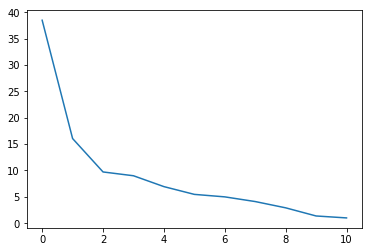

In [205]:
plt.plot(var_exp1)

In [288]:
from sklearn.decomposition import PCA

In [289]:

# PCA
pca1 = PCA(n_components=4)
pca1.fit_transform(edu_outl)

df_PC1 =pd.DataFrame(pca1.components_,columns=edu_outl.columns,index = ['PC-1','PC-2',"PC-3","PC-4"])

In [290]:
df_PC1

Apps  Top25perc  P.Undergrad  Room.Board     Books  Personal  \
PC-1  0.080181   0.421015    -0.076516    0.380406  0.038884 -0.172597   
PC-2  0.388093   0.284419     0.246354    0.060723  0.268604  0.464822   
PC-3 -0.075587  -0.251936    -0.001421    0.429071  0.165722  0.278034   
PC-4  0.086959  -0.285619     0.109360    0.608985 -0.121709 -0.474329   

      Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
PC-1  0.343890  -0.327167     0.389010  0.296136   0.412466  
PC-2  0.473393   0.271394    -0.316071  0.051249  -0.124991  
PC-3 -0.131650  -0.624159    -0.247272  0.235174  -0.344367  
PC-4  0.095595   0.319181    -0.394518 -0.059300   0.134392

In [291]:
series3=df_PC1.iloc[0]
series3

Apps           0.080181
Top25perc      0.421015
P.Undergrad   -0.076516
Room.Board     0.380406
Books          0.038884
Personal      -0.172597
Terminal       0.343890
S.F.Ratio     -0.327167
perc.alumni    0.389010
Expend         0.296136
Grad.Rate      0.412466
Name: PC-1, dtype: float64

In [280]:
lam = lambda x:x * np.asarray(series3)


In [281]:
edufi=edu_outl.apply(lam, axis=1)

In [282]:
edu['rank']=edufi.sum(axis = 1, skipna = True) 

In [283]:
edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  ...  Personal  PhD  \
0         2885          537      7440        3300  ...      2200   70   
1         2683         1227     12280        6450  ...      1500   29   
2         1036           99     11250        3750  ...      1165   53   
3          510           63     12960        5450  ...       875   92   
4          249          869      7560        4120  ...      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Total_Cost  Grad  \
0        78       18.1           12    7041         60        5950  M_gd   
1        30       12.2           16   10527         56        8700  M_gd   
2        66       12.9           30    8735         54        5315  M_gd   
3        97        7.7           37   19016         59        6775  M_gd   
4        72       11.9            2   10922         15        6420  L_gd   

       rank  
0 -1.691119  
1 -1.046129  
2 -0.641042  
3  2.805995  
4 -2.154492  

[5 rows x 21 columns]

In [284]:
edu.sort_values(by='rank',ascending = False).head(50)

Names   Apps  Accept  Enroll  Top10perc  \
158                      Dartmouth College   8587    2273    1087         87   
251                    Harvey Mudd College   1377     572     178         95   
775                        Yale University  10705    2453    1317         95   
763                       Williams College   4186    1245     526         81   
174                        Duke University  13789    3893    1583         90   
459                   Princeton University  13218    2042    1153         90   
663             University of Pennsylvania  12394    5232    2464         85   
250                     Harvard University  13865    2165    1606         90   
284               Johns Hopkins University   8474    3446     911         75   
16                         Amherst College   4302     992     418         83   
60                         Bowdoin College   3356    1019     418         76   
144                    Columbia University   6756    1930     871         78   
70                        Brown University  12586    3239    1462         87   
733                      Wellesley College   2895    1249     579         80   
609                  University of Chicago   6348    2999     922         68   
191                       Emory University   8506    4168    1236         76   
114              Claremont McKenna College   1860     767     227         71   
71                       Bryn Mawr College   1465     810     313         71   
137              College of the Holy Cross   2994    1691     659         70   
221                  Georgetown University  11115    2881    1390         71   
728                  Washington University   7654    5259    1254         62   
528                          Smith College   2925    1598     632         51   
515                        Scripps College    855     632     139         60   
354  Massachusetts Institute of Technology   6411    2140    1078         96   
708                  Vanderbilt University   7791    4690    1499         71   
242                       Hamilton College   3140    1783     454         40   
149                    Connecticut College   3035    1546     438         42   
593                     Trinity College CT   3058    1798     478         46   
37                         Barnard College   2496    1402     531         53   
709                         Vassar College   3550    1877     653         53   
86                        Carleton College   2694    1579     489         75   
428                        Oberlin College   4778    2767     678         50   
159                       Davidson College   2373     956     452         77   
601                       Union College NY   3495    1712     528         49   
424                Northwestern University  12289    5200    1902         85   
390                  Mount Holyoke College   1800    1314     526         47   
237                       Grinnell College   2039    1389     432         56   
123                     Colgate University   4856    2492     727         46   
720                 Wake Forest University   5661    2392     903         75   
725          Washington and Lee University   3315    1096     425         68   
309                      Lehigh University   6397    4304    1092         40   
122                          Colby College   2848    1319     456         58   
669                University of Rochester   8766    5498    1243         56   
737                    Wesleyan University   4772    1973     712         60   
575                    Sweet Briar College    462     402     146         36   
660               University of Notre Dame   7700    3700    1906         79   
734                          Wells College    318     240     130         40   
512                 Sarah Lawrence College   1380     768     263         57   
64                     Brandeis University   4186    2743     740         48   
407                    New York Unive

In [339]:
edu['Ranking']=edu['rank'].rank(ascending=False)

In [346]:
top_name=edu.sort_values(by='Ranking').head(15)
top_name

Names   Apps  Accept  Enroll  Top10perc  Top25perc  \
158           Dartmouth College   8587    2273    1087         87         99   
251         Harvey Mudd College   1377     572     178         95        100   
775             Yale University  10705    2453    1317         95         99   
763            Williams College   4186    1245     526         81         96   
174             Duke University  13789    3893    1583         90         98   
459        Princeton University  13218    2042    1153         90         98   
663  University of Pennsylvania  12394    5232    2464         85        100   
250          Harvard University  13865    2165    1606         90        100   
284    Johns Hopkins University   8474    3446     911         75         94   
16              Amherst College   4302     992     418         83         96   
60              Bowdoin College   3356    1019     418         76        100   
144         Columbia University   6756    1930     871         78         96   
70             Brown University  12586    3239    1462         87         95   
733           Wellesley College   2895    1249     579         80         96   
609       University of Chicago   6348    2999     922         68         94   

     F.Undergrad  P.Undergrad  Outstate  Room.Board  ...  PhD  Terminal  \
158         3918           32     19545        6070  ...   95        99   
251          654            5     17230        6690  ...  100       100   
775         5217           83     19840        6510  ...   96        96   
763         1988           29     19629        5790  ...   94        99   
174         6188           53     18590        5950  ...   95        96   
459         4540          146     19900        5910  ...   91        96   
663         9205          531     17020        7270  ...   95        96   
250         6862          320     18485        6410  ...   97        97   
284         3566         1569     18800        6740  ...   96        97   
16          1593            5     19760        5300  ...   93        98   
60          1490            8     19030        5885  ...   93        96   
144         3376           55     18624        6664  ...   97        98   
70          5643          349     19528        5926  ...   99       100   
733         2195          156     18345        5995  ...   94        98   
609         3340           39     18930        6380  ...   99        99   

     S.F.Ratio  perc.alumni  Expend  Grad.Rate  Total_Cost  Grad      rank  \
158        4.7           49   29619         98        7720  H_gd  4.965565   
251        8.2           46   21569        100        8290  H_gd  4.842331   
775        5.8           49   40386         99        9255  H_gd  4.738595   
763        9.0           64   22014         99        7490  H_gd  4.641620   
174        5.0           44   27206         97        7737  H_gd  4.627423   
459        8.4           54   28320         99        8160  H_gd  4.596280   
663        6.3           38   25765         93        9314  H_gd  4.571026   
250        9.9           52   37219        100        8830  H_gd  4.534889   
284        3.3           38   56233         90        8280  H_gd  4.491368   
16         8.4           63   21424        100        7558  H_gd  4.461619   
60        11.2           52   20447         96        8255  H_gd  4.383322   
144        5.9           21   30639         99        7514  H_gd  4.309045   
70         7.6           39   20440         97        7746  H_gd  4.299989   
733       10.6           51   21409         91        7195  H_gd  4.239354   
609        5.3           36   36854         90        8134  H_gd  4.233087   

    Ranking  
158     1.0  
251     2.0  
775     3.0  
763     4.0  
174     5.0  
459     6.0  
663     7.0  
250     8.0  
284     9.0  
16     10.0  
60     11.0  
144    12.0  
70     13.0  
733    14.0  
609    15.0  

[15 rows x 22 columns]

In [351]:
top_name["Names"]

158             Dartmouth College
251           Harvey Mudd College
775               Yale University
763              Williams College
174               Duke University
459          Princeton University
663    University of Pennsylvania
250            Harvard University
284      Johns Hopkins University
16                Amherst College
60                Bowdoin College
144           Columbia University
70               Brown University
733             Wellesley College
609         University of Chicago
Name: Names, dtype: object

In [387]:
edu.sort_values(by='Ranking').head(300)

Names   Apps  Accept  Enroll  Top10perc  \
158                      Dartmouth College   8587    2273    1087         87   
251                    Harvey Mudd College   1377     572     178         95   
775                        Yale University  10705    2453    1317         95   
763                       Williams College   4186    1245     526         81   
174                        Duke University  13789    3893    1583         90   
459                   Princeton University  13218    2042    1153         90   
663             University of Pennsylvania  12394    5232    2464         85   
250                     Harvard University  13865    2165    1606         90   
284               Johns Hopkins University   8474    3446     911         75   
16                         Amherst College   4302     992     418         83   
60                         Bowdoin College   3356    1019     418         76   
144                    Columbia University   6756    1930     871         78   
70                        Brown University  12586    3239    1462         87   
733                      Wellesley College   2895    1249     579         80   
609                  University of Chicago   6348    2999     922         68   
191                       Emory University   8506    4168    1236         76   
114              Claremont McKenna College   1860     767     227         71   
71                       Bryn Mawr College   1465     810     313         71   
137              College of the Holy Cross   2994    1691     659         70   
221                  Georgetown University  11115    2881    1390         71   
728                  Washington University   7654    5259    1254         62   
528                          Smith College   2925    1598     632         51   
515                        Scripps College    855     632     139         60   
354  Massachusetts Institute of Technology   6411    2140    1078         96   
708                  Vanderbilt University   7791    4690    1499         71   
242                       Hamilton College   3140    1783     454         40   
149                    Connecticut College   3035    1546     438         42   
593                     Trinity College CT   3058    1798     478         46   
37                         Barnard College   2496    1402     531         53   
709                         Vassar College   3550    1877     653         53   
..                                     ...    ...     ...     ...        ...   
371                    Millikin University   1444    1261     456         29   
266           Illinois Benedictine College    607     558     269         22   
227                     Gonzaga University   1886    1524     526         31   
476                        Roanoke College   2227    1790     437         27   
437                      Otterbein College   1496    1205     428         26   
110                    Christendom College     81      72      51         33   
35                           Barat College    261     192     111         15   
721                       Walsh University   1092     890     477         27   
132             College of Saint Elizabeth    444     359     122         34   
293                          Keuka College    461     381     174         10   
618               University of Evansville   2096    1626     694         35   
758                     Widener University   2139    1492     502         24   
546                St. John Fisher College   1368    1064     354         19   
666              University of Puget Sound   4044    2826     688         51   
351                      Maryville College   1464     888     176         26   
68                     Bridgewater College    838     673     292         22   
349            Marymount Manhattan College    695     535     239         21   
120                            Coe College   1006     742     275         29   
143                       Columbia Co

In [217]:
edu_final.describe()

Apps       Accept       Enroll  Top10perc   Top25perc  \
count     50.000000    50.000000    50.000000  50.000000   50.000000   
mean    5593.540000  2311.240000   832.260000  67.220000   90.800000   
std     3818.800726  1424.516224   518.088276  16.806571    7.677159   
min      462.000000   402.000000   139.000000  36.000000   68.000000   
25%     2859.750000  1265.250000   452.500000  53.000000   84.500000   
50%     4244.000000  1903.500000   668.500000  70.500000   93.000000   
75%     8303.250000  2969.500000  1181.500000  79.750000   96.000000   
max    13865.000000  5498.000000  2464.000000  96.000000  100.000000   

       F.Undergrad  P.Undergrad      Outstate   Room.Board        Books  \
count    50.000000    50.000000     50.000000    50.000000    50.000000   
mean   3212.980000   158.360000  18203.220000  5944.180000   600.440000   
std    2079.553715   290.052266   1512.779578   836.138786   203.751565   
min     527.000000     1.000000  13750.000000  3957.000000   300.000000   
25%    1634.000000    25.500000  17660.000000  5592.500000   500.000000   
50%    2618.000000    54.000000  18662.000000  5962.500000   562.500000   
75%    4525.250000   153.500000  19298.000000  6485.000000   652.500000   
max    9205.000000  1569.000000  20100.000000  8124.000000  1495.000000   

          Personal         PhD  Terminal  S.F.Ratio  perc.alumni  \
count    50.000000   50.000000   50.0000  50.000000    50.000000   
mean   1062.460000   92.020000   96.5800   8.668000    42.560000   
std     381.195553    5.586025    2.4751   2.522344    11.166934   
min     300.000000   77.000000   91.0000   3.300000    18.000000   
25%     802.500000   90.000000   96.0000   6.350000    36.250000   
50%    1017.500000   93.000000   97.0000   9.550000    44.500000   
75%    1250.000000   96.000000   98.7500  10.375000    50.500000   
max    2115.000000  100.000000  100.0000  13.100000    64.000000   

             Expend   Grad.Rate   Total_Cost       rank  
count     50.000000   50.000000    50.000000  50.000000  
mean   22874.740000   90.320000  7607.080000   4.350784  
std     9214.472321    7.627662   988.450443   0.541196  
min    12138.000000   61.000000  5057.000000   3.448725  
25%    17104.250000   88.250000  7196.250000   3.945102  
50%    19307.000000   91.000000  7639.000000   4.279818  
75%    26298.000000   95.750000  8160.000000   4.823768  
max    56233.000000  100.000000  9574.000000   5.529208

Details of top 50 colleges:

1) Mostly these colleges/universities have very high graduation rate.compared to overall it is 25% higher.

2) compared to overall colleges These institutions instructional expenditure per student,per.alumni,Phd and Terminal values are very high. Neary 50% higher than the overall.

3) But the Student/faculty ratio is lesser than the mean value of overall institutions. 

4) Personal, Room.Board and Books these variables didn't have much differences with the overall.

5) But these collges have many outstate students. Nearly 80% higher than the Overall. So these colleges shoud try to increase their Room.Board, and they have increase other board facilities with low cost.

6) 90% of of new students from top 25% of Higher Secondary class and 67% of Top 10% of Higher secondary class students studying in these institutions. Compared to overall its very high.



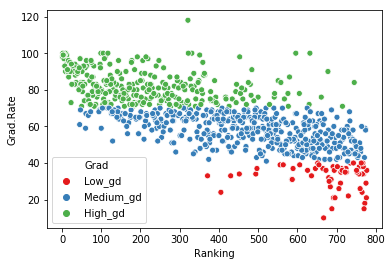

In [371]:
sns.scatterplot(edu['Ranking'], edu['Grad.Rate'], hue=edu['Grad'], palette='Set1') 

In [372]:
## This plot is based upon my PCA values and Grad.Rate and it clearly shows us some cluster and also tells us colleges
 # which got the rank of above 600 had a very poorgraduation rate.
    
## By this plot in future we can easly find out wether the selected college have good grad or not


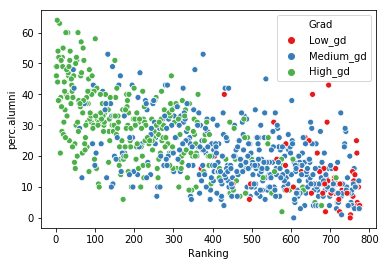

In [374]:
sns.scatterplot(edu['Ranking'], edu['perc.alumni'], hue=edu['Grad'], palette='Set1') 

In [375]:
## this plot shows us colleges with rank more than 400 didn't have good donation rate form alumni and also mostly they didn't
 # have good grad rate.

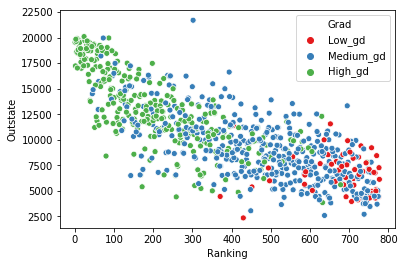

In [377]:
sns.scatterplot(edu['Ranking'], edu['Outstate'], hue=edu['Grad'], palette='Set1') 

In [378]:
## Many outstate students prefer Top 100 colleges and there is no outstate students in the last 200.

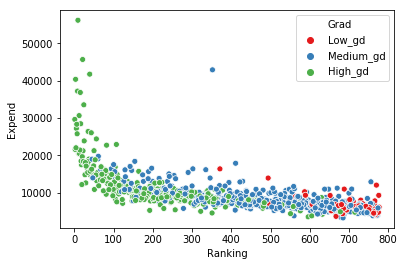

In [379]:
sns.scatterplot(edu['Ranking'], edu['Expend'], hue=edu['Grad'], palette='Set1') 

In [380]:
## Top50 colleges their expend rates are very high when compared with ohter colleges.


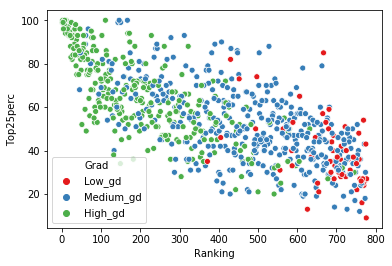

In [381]:
sns.scatterplot(edu['Ranking'], edu['Top25perc'], hue=edu['Grad'], palette='Set1')

In [382]:
## there is a negative correlation between the Top25students and ranking

In [ ]:
## If i didn't remove the outliers then my results became:

In [219]:
edu_cov_matrix1=np.cov(eduZ.T)
edu_cov_matrix1

array([[ 1.00128866,  0.35209304,  0.3987775 ,  0.16515151,  0.13272942,
         0.17896117,  0.36996762,  0.09575627, -0.09034216,  0.2599265 ,
         0.14694372],
       [ 0.35209304,  1.00128866, -0.05364569,  0.33191707,  0.115676  ,
        -0.08091441,  0.52542506, -0.29500852,  0.41840277,  0.52812713,
         0.47789622],
       [ 0.3987775 , -0.05364569,  1.00128866, -0.06140453,  0.08130416,
         0.32029384,  0.14208644,  0.23283016, -0.28115421, -0.08367612,
        -0.25733218],
       [ 0.16515151,  0.33191707, -0.06140453,  1.00128866,  0.12812787,
        -0.19968518,  0.3750222 , -0.36309504,  0.27271444,  0.50238599,
         0.42548915],
       [ 0.13272942,  0.115676  ,  0.08130416,  0.12812787,  1.00128866,
         0.17952581,  0.10008351, -0.03197042, -0.04025955,  0.11255393,
         0.00106226],
       [ 0.17896117, -0.08091441,  0.32029384, -0.19968518,  0.17952581,
         1.00128866, -0.03065256,  0.13652054, -0.2863366 , -0.09801804,
        -0.269

In [221]:
eig_vals2, eig_vecs2 = np.linalg.eig(edu_cov_matrix1)
print('Eigen Vectors \n%s', eig_vecs2)
print('\n Eigen Values \n%s', eig_vals2)

Eigen Vectors 
%s [[ 0.13758005  0.53370902 -0.26652176 -0.04923048 -0.02798828  0.35829195
   0.22739539 -0.36805722 -0.35745128  0.2858641   0.31136471]
 [ 0.39433807  0.17156024 -0.12984914 -0.09605971  0.38254434  0.09325907
  -0.67951999  0.31858362  0.03758079  0.26312886  0.00684317]
 [-0.11563373  0.51799633 -0.13012879  0.24882422 -0.21477962 -0.14490988
  -0.1237253   0.29023709  0.25021353 -0.49154037  0.41057062]
 [ 0.35499732  0.04695646  0.09638865 -0.06381802 -0.64349365  0.19665821
  -0.33988934 -0.18133608 -0.19215536 -0.29376801 -0.36608618]
 [ 0.05788083  0.25158612  0.66687254 -0.64105689 -0.00317904 -0.00592412
   0.08161907  0.02423157  0.18071682  0.00158199  0.19423233]
 [-0.1576972   0.38771045  0.37813528  0.30259703  0.4689993   0.01207493
  -0.0157133  -0.09116152 -0.33189613 -0.277448   -0.41769012]
 [ 0.32317235  0.30385124 -0.20918887 -0.01848363  0.02483269  0.04391225
   0.43763973  0.13069945  0.52370211  0.06656391 -0.51892383]
 [-0.32791669  0.180700

In [222]:
tot=sum(eig_vals2)
var_exp3=[(i/tot)*100 for i in sorted(eig_vals2,reverse=True)]
cum_var_exp3=np.cumsum(var_exp3)
print("cumulative",cum_var_exp3)

cumulative [ 32.34315617  50.53231218  60.11563771  67.83623091  74.95396109
  80.59371543  85.62972448  90.61952815  94.09945298  97.38889435
 100.        ]


In [223]:
from sklearn.decomposition import PCA
pca_3=PCA(n_components=5)
data_reduced5=pca_3.fit_transform(eduZ)
data_reduced5.transpose()

array([[-1.68570142, -1.14540761, -0.6441285 , ..., -0.45027732,
         6.7596785 , -0.14415189],
       [ 0.31755993, -0.6393414 , -1.29926471, ..., -0.48547475,
         1.56748692, -0.11683165],
       [-0.25650196,  2.36127019, -0.16227811, ...,  0.21677876,
         1.51402399, -1.39898151],
       [-0.24790584,  0.12584663, -0.76653065, ...,  0.47030791,
        -1.7568724 ,  1.04655106],
       [-0.94502803,  2.09606892, -0.35049283, ...,  0.27845169,
        -0.60527133, -0.97816284]])

In [224]:
from sklearn import preprocessing
data_scaled24 = pd.DataFrame(preprocessing.scale(eduZ),columns = eduZ.columns) 

# PCA
pca24 = PCA(n_components=5)
pca24.fit_transform(data_scaled24)

df_PC24 =pd.DataFrame(pca24.components_,columns=data_scaled24.columns,index = ['PC-1','PC-2',"PC-3","PC-4","PC-5"])

In [225]:
df_PC24
    

Apps  Top25perc  P.Undergrad  Room.Board     Books  Personal  \
PC-1  0.137580   0.394338    -0.115634    0.354997  0.057881 -0.157697   
PC-2  0.533709   0.171560     0.517996    0.046956  0.251586  0.387710   
PC-3 -0.266522  -0.129849    -0.130129    0.096389  0.666873  0.378135   
PC-4  0.049230   0.096060    -0.248824    0.063818  0.641057 -0.302597   
PC-5  0.027988  -0.382544     0.214780    0.643494  0.003179 -0.468999   

      Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
PC-1  0.323172  -0.327917     0.353614  0.422856   0.377010  
PC-2  0.303851   0.180701    -0.239839  0.084585  -0.109206  
PC-3 -0.209189  -0.416172    -0.056555  0.199643  -0.195347  
PC-4  0.018484   0.493637    -0.006196 -0.307787   0.284699  
PC-5 -0.024833  -0.076076    -0.379473  0.080321  -0.125843

In [226]:
series24=df_PC24.iloc[0]
series24

Apps           0.137580
Top25perc      0.394338
P.Undergrad   -0.115634
Room.Board     0.354997
Books          0.057881
Personal      -0.157697
Terminal       0.323172
S.F.Ratio     -0.327917
perc.alumni    0.353614
Expend         0.422856
Grad.Rate      0.377010
Name: PC-1, dtype: float64

In [227]:
flam = lambda x:x * np.asarray(series24)

In [228]:
edu24=data_scaled24.apply(flam, axis=1)

In [229]:
edu241=edu.copy()

In [230]:
edu241['rank']=edu24.sum(axis = 1, skipna = True) 

In [231]:
edu241.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  ...  Personal  PhD  \
0         2885          537      7440        3300  ...      2200   70   
1         2683         1227     12280        6450  ...      1500   29   
2         1036           99     11250        3750  ...      1165   53   
3          510           63     12960        5450  ...       875   92   
4          249          869      7560        4120  ...      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Total_Cost  Grad  \
0        78       18.1           12    7041         60        5950  M_gd   
1        30       12.2           16   10527         56        8700  M_gd   
2        66       12.9           30    8735         54        5315  M_gd   
3        97        7.7           37   19016         59        6775  M_gd   
4        72       11.9            2   10922         15        6420  L_gd   

       rank  
0 -1.685701  
1 -1.145408  
2 -0.644128  
3  2.990205  
4 -1.948171  

[5 rows x 21 columns]

In [232]:
edu241.sort_values(by='rank',ascending = False).head(10)


Names   Apps  Accept  Enroll  Top10perc  Top25perc  \
284    Johns Hopkins University   8474    3446     911         75         94   
775             Yale University  10705    2453    1317         95         99   
250          Harvard University  13865    2165    1606         90        100   
728       Washington University   7654    5259    1254         62         93   
158           Dartmouth College   8587    2273    1087         87         99   
609       University of Chicago   6348    2999     922         68         94   
459        Princeton University  13218    2042    1153         90         98   
174             Duke University  13789    3893    1583         90         98   
720      Wake Forest University   5661    2392     903         75         88   
663  University of Pennsylvania  12394    5232    2464         85        100   

     F.Undergrad  P.Undergrad  Outstate  Room.Board  ...  Personal  PhD  \
284         3566         1569     18800        6740  ...      1040   96   
775         5217           83     19840        6510  ...      2115   96   
250         6862          320     18485        6410  ...      1920   97   
728         4879         1274     18350        5775  ...      1512   91   
158         3918           32     19545        6070  ...      1100   95   
609         3340           39     18930        6380  ...      1254   99   
459         4540          146     19900        5910  ...      1575   91   
174         6188           53     18590        5950  ...      1162   95   
720         3499          172     13850        4360  ...      1250   95   
663         9205          531     17020        7270  ...      1544   95   

     Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Total_Cost  Grad  \
284        97        3.3           38   56233         90        8280  H_gd   
775        96        5.8           49   40386         99        9255  H_gd   
250        97        9.9           52   37219        100        8830  H_gd   
728        98        3.9           31   45702         90        8055  H_gd   
158        99        4.7           49   29619         98        7720  H_gd   
609        99        5.3           36   36854         90        8134  H_gd   
459        96        8.4           54   28320         99        8160  H_gd   
174        96        5.0           44   27206         97        7737  H_gd   
720        97        4.3           37   41766         89        6110  H_gd   
663        96        6.3           38   25765         93        9314  H_gd   

         rank  
284  7.748749  
775  6.759679  
250  6.374542  
728  6.312520  
158  6.016840  
609  5.873647  
459  5.721171  
174  5.702326  
720  5.509784  
663  5.467196  

[10 rows x 21 columns]

In [ ]:
## if i didnt remove the outliers these are my top colleges but most of  the inference i made from the imputed data remains
 # the same.